In [1]:
# import packages 

import pandas as pd     # data frame operations
import numpy as np      # arrays and math functions
from scipy.stats import uniform    #for training and test splits
import matplotlib.pyplot as plt    #2D plotting
import seaborn as sns   # pretty pretty graphs
import statsmodels.formula.api as smf  # R-like model specification

print('Hello world')

Hello world


In [2]:
# import data
zillow = pd.read_csv('Lab2data.csv')
#zillow.head()

In [3]:
print(len(zillow))
zillow.describe()

29537


,RegionID,SizeRank,RegionName,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
count,29537.000000,29537.000000,29537.000000,1.436100e+04,1.444300e+04,1.445700e+04,1.447400e+04,1.453900e+04,1.455800e+04,1.457300e+04,...,2.953700e+04,2.953400e+04,2.953700e+04,2.953700e+04,2.953400e+04,2.953700e+04,2.953700e+04,2.912200e+04,2.952200e+04,2.953700e+04
mean,80625.854251,15611.635474,48970.147848,1.201518e+05,1.202292e+05,1.206592e+05,1.214241e+05,1.225315e+05,1.236517e+05,1.242610e+05,...,3.537450e+05,3.526767e+05,3.488963e+05,3.451653e+05,3.436673e+05,3.409305e+05,3.365965e+05,3.390214e+05,3.364786e+05,3.390381e+05
std,27104.179509,9574.956749,27188.349896,8.591123e+04,8.649526e+04,8.686442e+04,8.731476e+04,8.849824e+04,8.947835e+04,8.985152e+04,...,3.865741e+05,3.821984e+05,3.756860e+05,3.703903e+05,3.695289e+05,3.679579e+05,3.637724e+05,3.599437e+05,3.594273e+05,3.617220e+05
min,58196.000000,0.000000,1001.000000,5.742850e+03,5.602530e+03,5.462235e+03,5.168195e+03,4.869194e+03,4.797451e+03,4.660341e+03,...,1.798714e+04,1.772503e+04,1.701521e+04,1.721009e+04,1.750713e+04,1.791131e+04,1.777577e+04,2.272551e+04,2.216984e+04,2.181716e+04
25%,69060.000000,7472.000000,26501.000000,6.255519e+04,6.255101e+04,6.291576e+04,6.339054e+04,6.407406e+04,6.464865e+04,6.523385e+04,...,1.647906e+05,1.652695e+05,1.640552e+05,1.626823e+05,1.621567e+05,1.606880e+05,1.583115e+05,1.619615e+05,1.596433e+05,1.607304e+05
50%,79424.000000,15027.000000,48770.000000,9.940127e+04,9.949938e+04,9.986699e+04,1.004961e+05,1.014584e+05,1.021457e+05,1.029119e+05,...,2.531324e+05,2.530864e+05,2.514636e+05,2.493687e+05,2.485025e+05,2.463016e+05,2.433628e+05,2.463448e+05,2.444207e+05,2.466416e+05
75%,88756.000000,23281.000000,70554.000000,1.535795e+05,1.536607e+05,1.539864e+05,1.549553e+05,1.561306e+05,1.573495e+05,1.581533e+05,...,4.096421e+05,4.094578e+05,4.057643e+05,4.022324e+05,4.005394e+05,3.969519e+05,3.917922e+05,3.939386e+05,3.921011e+05,3.951512e+05
max,808739.000000,39809.000000,99929.000000,1.280048e+06,1.301977e+06,1.309763e+06,1.332900e+06,1.344325e+06,1.381400e+06,1.455709e+06,...,1.457480e+07,1.472560e+07,1.465109e+07,1.457413e+07,1.466618e+07,1.456612e+07,1.446197e+07,1.410406e+07,1.411772e+07,1.451646e+07


## Cleaning

In [4]:
zillow.isnull().values.any()

True

In [5]:
check = zillow[zillow.isna().any(axis=1)]
check
# for dates, can prob just fill in avg
# What to put in for NaN under Metro? Copy City? 

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2/29/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,183176.35690,...,8.913137e+05,8.938362e+05,8.959224e+05,8.909287e+05,8.883210e+05,8.925438e+05,8.843343e+05,8.824177e+05,8.737372e+05,8.635221e+05
14,62085,14,11373,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,207036.43060,...,9.425333e+05,9.431175e+05,9.427246e+05,9.372694e+05,9.305301e+05,9.317878e+05,9.255853e+05,9.198431e+05,9.120761e+05,9.083296e+05
15,61807,15,10467,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Bronx County,129103.87270,...,5.956575e+05,5.918541e+05,5.894718e+05,5.845810e+05,5.818284e+05,5.811764e+05,5.723210e+05,5.714356e+05,5.661769e+05,5.589595e+05
29,61639,30,10025,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,NaN,...,2.637393e+06,2.563018e+06,2.588130e+06,2.598182e+06,2.651170e+06,2.673815e+06,2.655661e+06,2.555569e+06,2.569811e+06,2.515489e+06
30,62025,31,11214,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,181729.26350,...,1.015215e+06,1.012698e+06,1.009843e+06,1.001014e+06,9.948935e+05,9.967859e+05,9.890340e+05,9.887736e+05,9.855662e+05,9.794376e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29532,93941,39809,82515,zip,WY,WY,Riverton,"Riverton, WY",Fremont County,NaN,...,1.911088e+05,1.938500e+05,1.922239e+05,1.910492e+05,1.910236e+05,1.905587e+05,1.880080e+05,1.909070e+05,1.909052e+05,1.921320e+05
29533,62723,39809,12752,zip,NY,NY,Lake Huntington,NaN,Sullivan County,69761.06527,...,2.951337e+05,2.971270e+05,2.973898e+05,2.997761e+05,2.990506e+05,2.965927e+05,2.910484e+05,2.912859e+05,2.927173e+05,2.929496e+05
29534,97314,39809,93530,zip,CA,CA,Olancha,NaN,Inyo County,NaN,...,1.220798e+05,1.225701e+05,1.192983e+05,1.156914e+05,1.133496e+05,1.093729e+05,1.084030e+05,9.962150e+04,1.053547e+05,1.131834e+05
29535,98279,39809,95556,zip,CA,CA,Orleans,"Eureka-Arcata, CA",Humboldt County,NaN,...,2.522711e+05,2.457021e+05,2.361003e+05,2.280536e+05,2.220082e+05,2.139331e+05,2.082197e+05,2.231746e+05,2.250212e+05,2.203861e+05


In [ ]:
# fix NA for Metro
# zillow['Metro'] = zillow['Metro'].fillna(zillow['City'])
# zillow

# Tried, and it would print correctly but it wouldn't come out correctly later
# so we'll focus .isna on the numeric columns and move along

In [6]:
# fix NA for numeric columns
zillow = zillow.fillna(zillow.mean())
zillow

C:\Users\mmosi\AppData\Local\Temp\ipykernel_10512\1766920010.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zillow = zillow.fillna(zillow.mean())


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2/29/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,136381.718800,...,642301.06940,648817.37670,651262.80070,653313.86770,656523.01230,660818.04790,658487.63940,659103.87980,664707.40730,674072.84260
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,182967.687900,...,519571.33910,519962.99110,516384.12220,512656.62730,509169.67530,505610.08090,500700.84250,497582.26680,499267.73980,503385.01040
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111729.339600,...,288071.81980,289235.99490,288142.08310,287141.85860,285243.44810,282822.81190,280130.85970,277844.80530,276976.66870,277832.49220
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,183176.356900,...,891313.73960,893836.19580,895922.41340,890928.67470,888320.96400,892543.82130,884334.30100,882417.73780,873737.24350,863522.05450
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,176118.644300,...,486236.22980,479765.70120,471313.13630,461931.76810,453393.52350,443961.69610,435271.04620,431520.16820,429578.43290,429202.30110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29532,93941,39809,82515,zip,WY,WY,Riverton,"Riverton, WY",Fremont County,120151.843842,...,191108.80330,193850.04740,192223.94700,191049.23980,191023.58410,190558.70220,188007.98770,190906.98700,190905.19430,192131.98540
29533,62723,39809,12752,zip,NY,NY,Lake Huntington,NaN,Sullivan County,69761.065270,...,295133.68480,297127.04270,297389.83200,299776.06220,299050.55590,296592.72150,291048.40520,291285.89350,292717.28490,292949.56520
29534,97314,39809,93530,zip,CA,CA,Olancha,NaN,Inyo County,120151.843842,...,122079.81260,122570.09100,119298.34540,115691.40380,113349.62980,109372.89010,108402.96300,99621.49872,105354.66770,113183.41590
29535,98279,39809,95556,zip,CA,CA,Orleans,"Eureka-Arcata, CA",Humboldt County,120151.843842,...,252271.13970,245702.13390,236100.32120,228053.61520,222008.22130,213933.06000,208219.67010,223174.64470,225021.21390,220386.09260


In [7]:
# one more check
zillow.isnull().values.any()

True

In [8]:
zillow

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2/29/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,136381.718800,...,642301.06940,648817.37670,651262.80070,653313.86770,656523.01230,660818.04790,658487.63940,659103.87980,664707.40730,674072.84260
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,182967.687900,...,519571.33910,519962.99110,516384.12220,512656.62730,509169.67530,505610.08090,500700.84250,497582.26680,499267.73980,503385.01040
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111729.339600,...,288071.81980,289235.99490,288142.08310,287141.85860,285243.44810,282822.81190,280130.85970,277844.80530,276976.66870,277832.49220
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,183176.356900,...,891313.73960,893836.19580,895922.41340,890928.67470,888320.96400,892543.82130,884334.30100,882417.73780,873737.24350,863522.05450
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,176118.644300,...,486236.22980,479765.70120,471313.13630,461931.76810,453393.52350,443961.69610,435271.04620,431520.16820,429578.43290,429202.30110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29532,93941,39809,82515,zip,WY,WY,Riverton,"Riverton, WY",Fremont County,120151.843842,...,191108.80330,193850.04740,192223.94700,191049.23980,191023.58410,190558.70220,188007.98770,190906.98700,190905.19430,192131.98540
29533,62723,39809,12752,zip,NY,NY,Lake Huntington,NaN,Sullivan County,69761.065270,...,295133.68480,297127.04270,297389.83200,299776.06220,299050.55590,296592.72150,291048.40520,291285.89350,292717.28490,292949.56520
29534,97314,39809,93530,zip,CA,CA,Olancha,NaN,Inyo County,120151.843842,...,122079.81260,122570.09100,119298.34540,115691.40380,113349.62980,109372.89010,108402.96300,99621.49872,105354.66770,113183.41590
29535,98279,39809,95556,zip,CA,CA,Orleans,"Eureka-Arcata, CA",Humboldt County,120151.843842,...,252271.13970,245702.13390,236100.32120,228053.61520,222008.22130,213933.06000,208219.67010,223174.64470,225021.21390,220386.09260


There were NAs in some of the entries, so I filled those with the column's average values to avoid losing data.

## The question:
#### Which 3 areas provide the best investment?
#### Time series plots for Hot Springs, Little Rock, Fayetteville, Searcy; 1997 to now

In [9]:
# Narrow to Arkansas = AR
dfAK = zillow.loc[zillow['State']=='AR']
print(len(dfAK))
dfAK.head(3)

397


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2/29/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
681,89749,690,72764,zip,AR,AR,Springdale,"Fayetteville-Springdale-Rogers, AR",Washington County,91169.69811,...,284792.8023,285460.7591,285365.2692,284747.9860,285329.6233,284330.6512,281915.7927,283576.9994,284539.5214,287067.5724
979,89319,988,72034,zip,AR,AR,Conway,"Little Rock-North Little Rock-Conway, AR",Faulkner County,100161.53320,...,258591.2444,259536.0470,259176.1995,259302.6955,259305.0450,258888.8056,258299.6829,260494.1855,261759.8371,265915.0936
1051,89707,1060,72701,zip,AR,AR,Fayetteville,"Fayetteville-Springdale-Rogers, AR",Washington County,88560.56948,...,383877.7799,382617.6451,380808.6007,380734.2912,380714.0913,378653.3917,374255.6210,373441.5059,376053.2965,379924.3453


In [10]:
# What are the unique entries for Metro?
dfAK2 = dfAK['Metro'].unique()
dfAK2

# We only want to keep
# 'Fayetteville-Springdale-Rogers, AR'
# 'Little Rock-North Little Rock-Conway, AR'
# 'Hot Springs, AR'
# 'Searcy, AR'

array(['Fayetteville-Springdale-Rogers, AR',
       'Little Rock-North Little Rock-Conway, AR', 'Hot Springs, AR',
       'Jonesboro, AR', 'Paragould, AR', 'Searcy, AR', 'Texarkana, TX-AR',
       'Fort Smith, AR-OK', 'Pine Bluff, AR', 'El Dorado, AR',
       'Harrison, AR', 'Mountain Home, AR', 'Russellville, AR',
       'Batesville, AR', 'Malvern, AR', 'Memphis, TN-MS-AR',
       'Blytheville, AR', 'Forrest City, AR', 'Magnolia, AR',
       'Camden, AR', 'Arkadelphia, AR', 'Hope, AR', nan,
       'Helena-West Helena, AR'], dtype=object)

In [17]:
dfKAMetro = dfAK.loc[dfAK['Metro'].isin(["Fayetteville-Springdale-Rogers, AR","Little Rock-North Little Rock-Conway, AR","Hot Springs, AR","Searcy, AR"])]
print(len(dfKAMetro))
dfKAMetro.Metro.value_counts()

110


Little Rock-North Little Rock-Conway, AR    56
Fayetteville-Springdale-Rogers, AR          35
Searcy, AR                                  12
Hot Springs, AR                              7
Name: Metro, dtype: int64

In [22]:
# reconfigure table
# drop RegionID, SizeRank, RegionName, RegionType, StateName, State, City

dfKAMetro = dfKAMetro.drop(['RegionID','SizeRank','RegionName','RegionType','StateName','State','City','CountyName'],axis=1)
dfKAMetro.describe()

,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,11/30/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,80398.121570,81010.846300,81394.910022,82066.446893,82636.778025,83214.542904,83494.468052,83694.875585,84197.105353,83966.221789,...,232127.409103,232345.343229,231392.673958,230433.762864,230369.559211,229017.638287,227597.327344,231862.486695,230981.324815,233430.409966
std,34520.684174,34610.411095,34671.991907,34903.829435,35264.118447,35512.133862,35526.695962,35500.475449,35675.777105,35376.673108,...,94361.664832,93859.507576,93325.915687,92958.042471,93247.245463,93184.380140,92380.718035,91208.005853,91743.184194,92750.393860
min,26409.423100,25736.654830,26198.749650,26766.370630,26433.454680,26275.437750,26303.630430,27266.381680,27976.998450,28510.632070,...,65191.590530,67426.189890,67421.045980,67878.711360,68368.194380,68226.161590,68587.892460,73227.021470,72837.309360,73397.939590
25%,56659.539345,57596.294770,57637.523343,57926.291880,58215.484982,58451.869267,58577.953483,58742.326213,59437.090885,59367.555853,...,163412.981200,164271.729275,164212.030300,164766.404500,164481.379250,161418.989475,160732.739300,169059.119675,163410.510700,167732.935225
50%,70366.442280,70778.815400,70738.428345,71240.681850,71861.038725,72602.353680,72697.164000,72520.312005,73409.051160,73685.752825,...,220368.284750,222035.018550,221829.348700,220083.926200,219012.052400,218238.790050,216168.861800,218717.925350,218156.429800,221284.280100
75%,103003.568025,103565.073125,103928.458925,104393.075025,105202.753525,106617.114350,107477.331700,108046.975650,108310.304650,108231.198425,...,293196.439200,293496.723850,292556.634550,290448.878450,290845.529250,287141.485400,284265.552375,288862.283925,287165.053525,290945.025125
max,216140.257700,219692.329600,220402.741600,221988.655300,223586.299000,225009.067700,224321.582900,224362.100100,226931.916100,225093.936200,...,479183.588200,479782.692700,477857.576700,476489.213300,478088.007800,478010.699400,476400.945300,475178.046900,477641.091100,482359.416400


In [26]:
dfKAMetro = dfKAMetro.groupby('Metro').agg(np.mean)
dfKAMetro

,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,11/30/1996,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
Metro,,,,,,,,,,,,,,,,,,,,,
"Fayetteville-Springdale-Rogers, AR",80878.764100,81137.367537,81637.009022,82009.734472,82370.835522,82673.882465,83163.715365,83705.879488,84625.772727,84251.766087,...,306557.424169,304855.957666,302926.169466,301150.413020,301795.091931,300762.242620,299463.946689,299457.643366,301253.023697,303784.780351
"Hot Springs, AR",53763.488426,54550.044764,55648.112989,56162.976673,56312.388600,56873.116119,56431.556203,56290.288337,56216.789921,55903.841154,...,226018.454171,226142.147871,225130.509271,223581.488343,223318.887386,222301.582671,219376.267514,220491.278214,220252.300257,221346.451043
"Little Rock-North Little Rock-Conway, AR",86520.817496,87410.983584,87684.537045,88589.458294,89370.342184,90180.405226,90339.382292,90393.974940,90794.037544,90555.528329,...,203968.577679,205053.019231,204606.036937,204288.206957,203807.378764,202067.878179,200551.881763,207978.307681,204409.047778,206892.236717
"Searcy, AR",65960.535873,66209.986260,66356.160104,66901.495877,67345.038076,67649.943972,68302.928850,68386.326442,68482.992622,68753.009105,...,150011.302184,151838.760399,151410.547557,150186.620947,150114.822760,149445.788597,148994.051871,152802.653422,156284.760240,159123.947539


In [27]:
dfKAMet = dfKAMetro.T
dfKAMet

Metro,"Fayetteville-Springdale-Rogers, AR","Hot Springs, AR","Little Rock-North Little Rock-Conway, AR","Searcy, AR"
2/29/1996,80878.764100,53763.488426,86520.817496,65960.535873
3/31/1996,81137.367537,54550.044764,87410.983584,66209.986260
4/30/1996,81637.009022,55648.112989,87684.537045,66356.160104
5/31/1996,82009.734472,56162.976673,88589.458294,66901.495877
6/30/1996,82370.835522,56312.388600,89370.342184,67345.038076
...,...,...,...,...
11/30/2022,300762.242620,222301.582671,202067.878179,149445.788597
12/31/2022,299463.946689,219376.267514,200551.881763,148994.051871
1/31/2023,299457.643366,220491.278214,207978.307681,152802.653422
2/28/2023,301253.023697,220252.300257,204409.047778,156284.760240


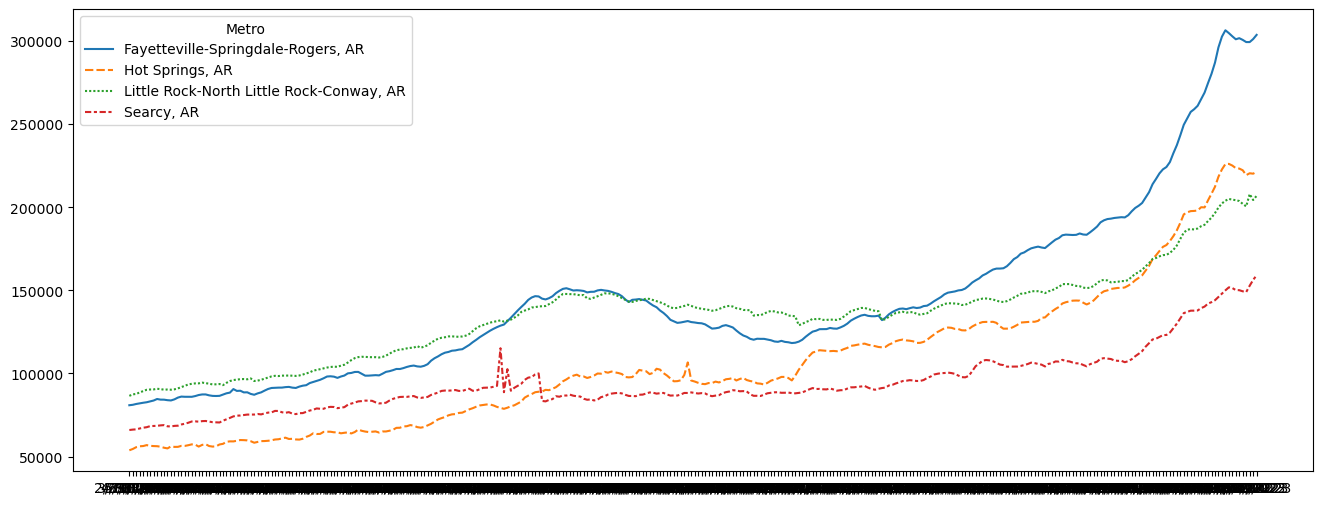

In [33]:
plt.figure(figsize=(16,6))
sns.lineplot(data=dfKAMet)
plt.show()

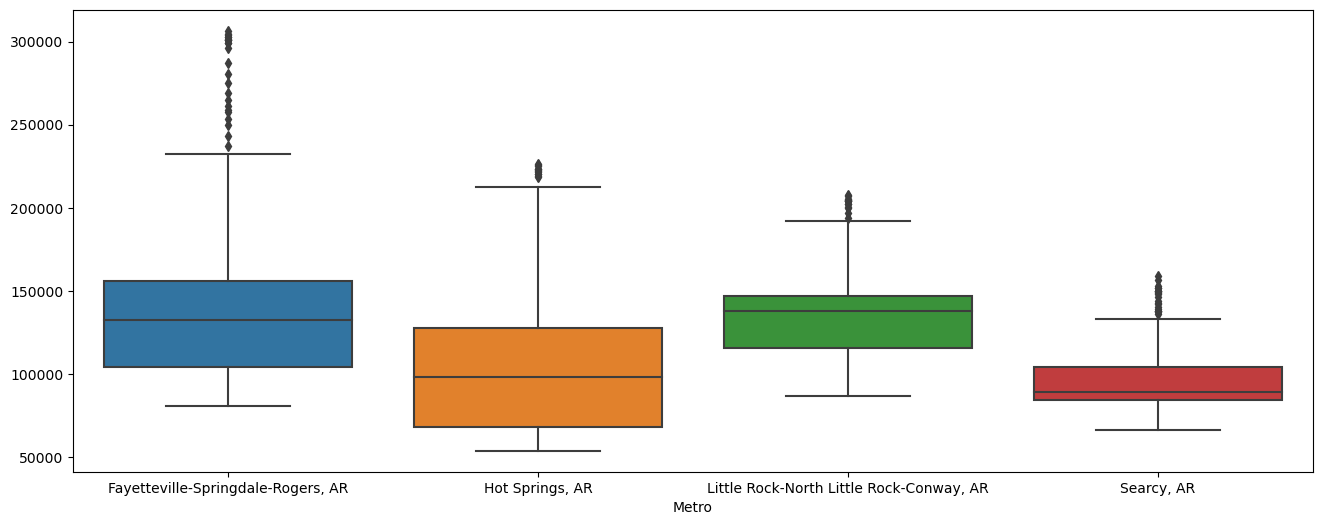

In [34]:
plt.figure(figsize=(16,6))
sns.boxplot(data=dfKAMet)
plt.show()

The highest average value is Fayetteville. The second highest and growing is Little Rock. However, I think the best investment would be in Hot Springs, because it is currently the fastest growing. 